<a href="https://colab.research.google.com/github/wei-enwang/space-ham/blob/main/main_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import nltk
from nltk.corpus import words
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils import data
from preprocess import WholeData, BalancedData

import models
import utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/weinwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('words')

device = "cuda" if torch.cuda.is_available() else "cpu"
assert device == "cuda"   # use gpu whenever you can!

seed = 32
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

[nltk_data] Downloading package words to /home/weinwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
plot_yes = True

# use one dataset for now
train_data_dir = "./data/enron1/"
test_data_dir = "./data/enron2/"
output_dir = "./output/"

# hyperparameters
batch_size = 64
hidden_size = 128
num_layer = 3
dropout = 0.5
learning_rate = 1e-4
epochs = 30
max_len = 300

In [4]:
vocab = set([str.lower() for str in words.words()])

train_dataset = WholeData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
test_dataset = WholeData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# Balanced dataset
# train_dataset = BalancedData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# test_dataset = BalancedData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)

w2idx = train_dataset.src_v2id

embed = utils.load_pretrained_vectors(w2idx, "fastText/crawl-300d-2M.vec")
embed = torch.tensor(embed)

Loading pretrained vectors...
234378


0it [00:00, ?it/s]

There are 75835 / 234379 pretrained vectors found.


In [5]:
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                                   num_workers=8, pin_memory=True)
test_dataloader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, 
                                  num_workers=8, pin_memory=True, drop_last=True)


In [6]:
model = models.spam_lstm(hidden_size=hidden_size, pretrained_embedding=embed, dropout=dropout).to(device)
loss_fn = nn.BCEWithLogitsLoss().to(device)
opt = Adam(model.parameters(), lr=learning_rate)

Using pretrained vectors...


  0%|          | 0/30 [00:00<?, ?it/s]/home/weinwang/anaconda3/envs/nlp/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
  3%|▎         | 1/30 [00:12<05:54, 12.22s/it]

Epoch 0
-------------------------------
Training loss: 0.638315, avg accuracy: 0.709891
Testing loss: 0.570466, avg accuracy: 0.745021


  7%|▋         | 2/30 [00:24<05:42, 12.25s/it]

Epoch 1
-------------------------------
Training loss: 0.599499, avg accuracy: 0.709936
Testing loss: 0.569280, avg accuracy: 0.744334


 10%|█         | 3/30 [00:36<05:31, 12.26s/it]

Epoch 2
-------------------------------
Training loss: 0.595437, avg accuracy: 0.710069
Testing loss: 0.573379, avg accuracy: 0.745021


 13%|█▎        | 4/30 [00:49<05:19, 12.27s/it]

Epoch 3
-------------------------------
Training loss: 0.587644, avg accuracy: 0.710693
Testing loss: 0.561881, avg accuracy: 0.745192


 17%|█▋        | 5/30 [01:01<05:06, 12.26s/it]

Epoch 4
-------------------------------
Training loss: 0.513619, avg accuracy: 0.725056
Testing loss: 0.353599, avg accuracy: 0.752404


 20%|██        | 6/30 [01:13<04:54, 12.25s/it]

Epoch 5
-------------------------------
Training loss: 0.458476, avg accuracy: 0.739034
Testing loss: 0.415353, avg accuracy: 0.736779


 23%|██▎       | 7/30 [01:25<04:41, 12.24s/it]

Epoch 6
-------------------------------
Training loss: 0.460038, avg accuracy: 0.737402
Testing loss: 0.350405, avg accuracy: 0.754293


 27%|██▋       | 8/30 [01:37<04:29, 12.24s/it]

Epoch 7
-------------------------------
Training loss: 0.440595, avg accuracy: 0.744643
Testing loss: 0.336955, avg accuracy: 0.867102


 30%|███       | 9/30 [01:50<04:17, 12.26s/it]

Epoch 8
-------------------------------
Training loss: 0.448977, avg accuracy: 0.764987
Testing loss: 0.369088, avg accuracy: 0.885646


 33%|███▎      | 10/30 [02:02<04:05, 12.27s/it]

Epoch 9
-------------------------------
Training loss: 0.468668, avg accuracy: 0.748012
Testing loss: 0.348300, avg accuracy: 0.882212


 37%|███▋      | 11/30 [02:14<03:53, 12.26s/it]

Epoch 10
-------------------------------
Training loss: 0.451022, avg accuracy: 0.762509
Testing loss: 0.422968, avg accuracy: 0.754808


 40%|████      | 12/30 [02:27<03:41, 12.28s/it]

Epoch 11
-------------------------------
Training loss: 0.462785, avg accuracy: 0.738871
Testing loss: 0.348790, avg accuracy: 0.760646


 43%|████▎     | 13/30 [02:39<03:28, 12.28s/it]

Epoch 12
-------------------------------
Training loss: 0.431242, avg accuracy: 0.746276
Testing loss: 0.345600, avg accuracy: 0.762534


 47%|████▋     | 14/30 [02:51<03:16, 12.29s/it]

Epoch 13
-------------------------------
Training loss: 0.432664, avg accuracy: 0.749436
Testing loss: 0.342618, avg accuracy: 0.874657


 50%|█████     | 15/30 [03:04<03:04, 12.31s/it]

Epoch 14
-------------------------------
Training loss: 0.408614, avg accuracy: 0.813776
Testing loss: 0.330663, avg accuracy: 0.870707


 53%|█████▎    | 16/30 [03:16<02:52, 12.31s/it]

Epoch 15
-------------------------------
Training loss: 0.389794, avg accuracy: 0.853944
Testing loss: 0.373359, avg accuracy: 0.854567


 57%|█████▋    | 17/30 [03:28<02:40, 12.31s/it]

Epoch 16
-------------------------------
Training loss: 0.388710, avg accuracy: 0.852549
Testing loss: 0.378052, avg accuracy: 0.853194


 60%|██████    | 18/30 [03:41<02:27, 12.32s/it]

Epoch 17
-------------------------------
Training loss: 0.386477, avg accuracy: 0.852104
Testing loss: 0.374766, avg accuracy: 0.855426


 63%|██████▎   | 19/30 [03:53<02:15, 12.32s/it]

Epoch 18
-------------------------------
Training loss: 0.385376, avg accuracy: 0.853618
Testing loss: 0.378798, avg accuracy: 0.854224


 67%|██████▋   | 20/30 [04:05<02:02, 12.28s/it]

Epoch 19
-------------------------------
Training loss: 0.382680, avg accuracy: 0.855814
Testing loss: 0.375586, avg accuracy: 0.855769


 70%|███████   | 21/30 [04:17<01:50, 12.29s/it]

Epoch 20
-------------------------------
Training loss: 0.386029, avg accuracy: 0.853336
Testing loss: 0.373743, avg accuracy: 0.856971


 73%|███████▎  | 22/30 [04:30<01:38, 12.30s/it]

Epoch 21
-------------------------------
Training loss: 0.384340, avg accuracy: 0.854256
Testing loss: 0.371295, avg accuracy: 0.856799


 77%|███████▋  | 23/30 [04:42<01:26, 12.29s/it]

Epoch 22
-------------------------------
Training loss: 0.382507, avg accuracy: 0.855829
Testing loss: 0.358529, avg accuracy: 0.862809


 80%|████████  | 24/30 [04:54<01:13, 12.31s/it]

Epoch 23
-------------------------------
Training loss: 0.388547, avg accuracy: 0.851140
Testing loss: 0.386625, avg accuracy: 0.791380


 83%|████████▎ | 25/30 [05:07<01:01, 12.31s/it]

Epoch 24
-------------------------------
Training loss: 0.368353, avg accuracy: 0.829935
Testing loss: 0.314760, avg accuracy: 0.850790


 87%|████████▋ | 26/30 [05:19<00:49, 12.30s/it]

Epoch 25
-------------------------------
Training loss: 0.350476, avg accuracy: 0.854953
Testing loss: 0.304532, avg accuracy: 0.868475


 90%|█████████ | 27/30 [05:31<00:36, 12.29s/it]

Epoch 26
-------------------------------
Training loss: 0.353463, avg accuracy: 0.857758
Testing loss: 0.298923, avg accuracy: 0.879464


 93%|█████████▎| 28/30 [05:43<00:24, 12.28s/it]

Epoch 27
-------------------------------
Training loss: 0.352078, avg accuracy: 0.860058
Testing loss: 0.297538, avg accuracy: 0.881868


 97%|█████████▋| 29/30 [05:56<00:12, 12.30s/it]

Epoch 28
-------------------------------
Training loss: 0.448471, avg accuracy: 0.800258
Testing loss: 0.564157, avg accuracy: 0.749141


100%|██████████| 30/30 [06:08<00:00, 12.29s/it]

Epoch 29
-------------------------------
Training loss: 0.564929, avg accuracy: 0.740251
Testing loss: 0.563990, avg accuracy: 0.743819


Final testing loss: 0.564208, testing accuracy: 0.743647
Ham Precision: 0.753929, Recall: 0.973484, F1 score: 0.849753.
Ham Precision: 0.486607, Recall: 0.073302, F1 score: 0.127411.


(0.5649286074402892, 0.56420815547744)

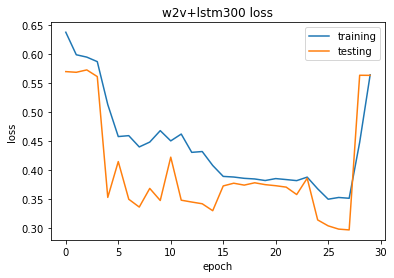

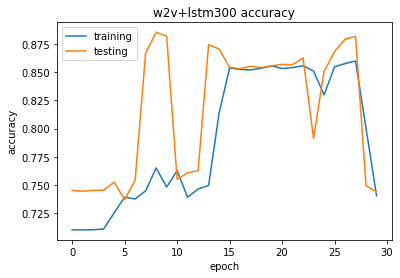

In [7]:
utils.train_test_scheme(train_dataloader, test_dataloader, model, loss_fn, opt, 
                        task_name="w2v+lstm300", epochs=epochs, 
                        vis=plot_yes, print_every=1, img_dir=output_dir)



In [8]:
#torch.save(model.state_dict(), output_dir+"balancew2v_lstm100batch32.pt")

In [9]:
#test_message = "Subject: Look, I understand everything, but this is a frank bust... Look here and tell me your opinion"

In [10]:
# from preprocess import clean_string
# context = clean_string(test_message)
# sent_id = [0 for _ in range(max_len)]
# for i, w in enumerate(context):
#     if i >= max_len:
#         break
#     if w not in train_dataset.vocab:
#         w = '<unk>'
#     sent_id[i] = train_dataset.src_v2id[w]
# sent_id = torch.unsqueeze(torch.tensor(sent_id),dim=0).to(device)

In [11]:
# model.eval()
# print(f"Email message: \"{test_message}\"")
# with torch.no_grad():
#     pred = nn.Sigmoid()(model(sent_id))
#     pred = torch.squeeze(pred)

#     if pred > 0.5:
#         print("This is a ham email message.")
#     else:
#         print("This is a spam email message.")

# print(f"The probability of this email being a spam is {(1-pred)*100:.1f}%.")